In [1]:
#Installed Libraries and Reading the Data File
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:

data = pd.read_csv('movie_classification.csv')

In [3]:
data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [7]:
data.isna().sum().sort_values(ascending=False)

Time_taken             12
Marketing expense       0
Trailer_views           0
Collection              0
Num_multiplex           0
Avg_age_actors          0
Genre                   0
Twitter_hastags         0
3D_available            0
Critic_rating           0
Production expense      0
Producer_rating         0
Director_rating         0
Lead_Actress_rating     0
Lead_ Actor_Rating      0
Movie_length            0
Budget                  0
Multiplex coverage      0
Start_Tech_Oscar        0
dtype: int64

In [8]:
dictionary = {
    'Time_taken':data['Time_taken'].mean()
}

In [9]:
data2 = data.fillna(value=dictionary)
data2.isnull().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
Start_Tech_Oscar       0
dtype: int64

In [10]:
data['Genre'].unique()

array(['Thriller', 'Drama', 'Comedy', 'Action'], dtype=object)

In [11]:
X_encoded = pd.get_dummies(data2, columns= ['Genre','3D_available'], drop_first = False)

X_encoded.head() #True=1, False=0


,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller,3D_available_NO,3D_available_YES
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,23,494,48000,1,False,False,False,True,False,True
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,42,462,43200,0,False,False,True,False,True,False
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,38,458,69400,1,False,True,False,False,True,False
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,45,472,66800,1,False,False,True,False,False,True
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,55,395,72400,1,False,False,True,False,True,False


In [12]:
X= X_encoded.drop(columns=['Collection'], axis=1)
y= X_encoded['Collection']
# Initializing and traing the model
# Reserve the first five rows for comparison
X_validation = X.iloc[:5]
y_validation = y.iloc[:5]

# Use the rest of the data for training and testing
X_remaining = X.iloc[5:]
y_remaining = y.iloc[5:]

# Train-test split on the data
X_train, X_test, y_train, y_test = train_test_split(X_remaining, y_remaining, test_size=0.20, random_state=5)

mlr_model = LinearRegression()
mlr_model.fit(X_train.values, y_train.values)

# Predicting on test set
y_pred_validation = mlr_model.predict(X_validation.values)
#Predicting on the reserved data to validate the model
y_pred_mlr = mlr_model.predict(X_test.values)

mse = mean_squared_error(y_test, y_pred_mlr)
rmse = np.sqrt(mse)
R2=r2_score(y_test, y_pred_mlr)

print("Mean Squared Error",mse)
print("Root Mean Squared Error", rmse)
print("R2 Score",R2)

Mean Squared Error 57843628.91611508
Root Mean Squared Error 7605.499912307874
R2 Score 0.8239572515843503


In [13]:
#Table to display the actual and predicted values side by side
print("Reserved Rows Comparison:")
Comparison = pd.DataFrame({
    'Actual': y_validation.values,
    'Predicted': y_pred_validation
})
print(Comparison)

Reserved Rows Comparison:
   Actual     Predicted
0   48000  61015.855871
1   43200  43256.691388
2   69400  59184.368582
3   66800  66543.515119
4   72400  65584.715546


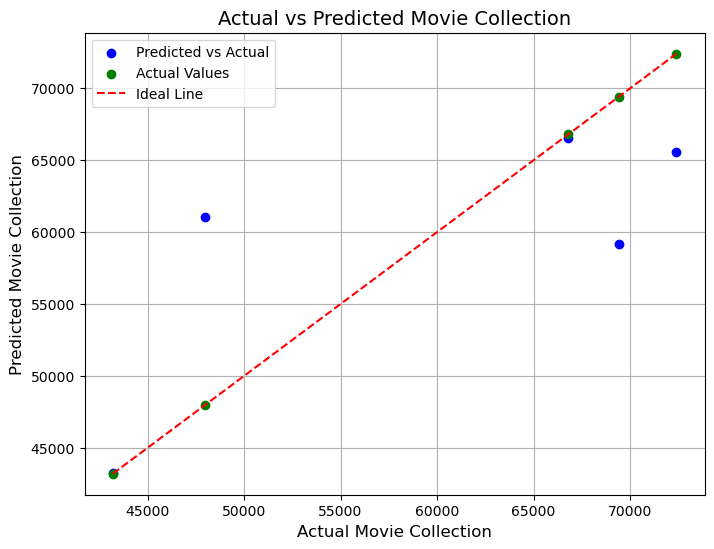

In [14]:
#Scatter plot to visualize the percision of the predictions
actual = list(y_validation.values)
predicted = list(y_pred_validation)
 
plt.figure(figsize=(8, 6))
plt.scatter(actual, predicted, color='blue', label='Predicted vs Actual')
plt.scatter(actual, actual, color='green', label='Actual Values')
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], color='red', linestyle='--', label='Ideal Line')

plt.xlabel('Actual Movie Collection', fontsize=12)
plt.ylabel('Predicted Movie Collection', fontsize=12)
plt.title('Actual vs Predicted Movie Collection', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [15]:
import pandas as pd
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Assuming X_encoded is already defined
X = X_encoded.drop(columns=['Collection'], axis=1)
y = X_encoded['Collection']

# Reserve the first five rows for comparison
X_validation = X.iloc[:5]
y_validation = y.iloc[:5]

# Use the rest of the data for training and testing
X_remaining = X.iloc[5:]
y_remaining = y.iloc[5:]

# Train-test split on the data
X_train, X_test, y_train, y_test = train_test_split(X_remaining, y_remaining, test_size=0.20, random_state=5)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_validation_scaled = scaler.transform(X_validation)

# Apply SMOTE to the training data
smote = SMOTE(random_state=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train.values)

# Initialize the Logistic Regression model with increased max_iter and different solver
logistic_model = LogisticRegression(max_iter=10000, solver='saga')

# Fit the model on the resampled data
logistic_model.fit(X_train_resampled, y_train_resampled)

# Predicting on validation set
y_pred_validation = logistic_model.predict(X_validation_scaled)

# Predicting on the test set
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
class_report = classification_report(y_test, y_pred_logistic, zero_division=1)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\APBaker\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

C:\Users\APBaker\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\APBaker\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\APBaker\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\APBaker\anaconda3\Lib\site-packages\sklearn\metr

Accuracy: 0.009900990099009901
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

       10000       0.00      0.00      0.00         1
       12600       0.00      0.00      0.00         1
       14400       0.00      0.00      0.00         1
       15000       0.00      0.00      0.00         0
       16400       0.00      0.00      0.00         1
       16800       0.00      0.00      0.00         1
       17600       0.00      0.00      0.00         0
       20800       0.00      0.00      0.00         0
       21800       0.00      0.00      0.00         1
       23400       0.00      0.00      0.00         1
       23600       0.00      0.00      0.00         1
       24600       0.00      0.00      0.00         1
       25400       0.00      0.00      0.00         1
       26200       0.00      0.00      0.00      

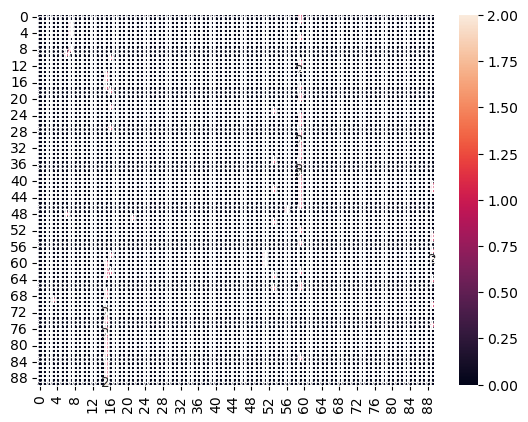

In [17]:


# Assuming X_encoded is already defined
X = X_encoded.drop(columns=['Collection'], axis=1)
y = X_encoded['Collection']

# Reserve the first five rows for comparison
X_validation = X.iloc[:5]
y_validation = y.iloc[:5]

# Use the rest of the data for training and testing
X_remaining = X.iloc[5:]
y_remaining = y.iloc[5:]

# Train-test split on the data
X_train, X_test, y_train, y_test = train_test_split(X_remaining, y_remaining, test_size=0.20, random_state=5)

scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_validation_scaled = scaler.transform(X_validation)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=10000, solver='saga')

# Fit the model
logistic_model.fit(X_train.values, y_train.values)

# Predicting on validation set
y_pred_validation = logistic_model.predict(X_validation_scaled)

# Predicting on the test set
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
class_report = classification_report(y_test, y_pred_logistic)
sns.heatmap(conf_matrix, annot=True)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

In [23]:
print(X_train.shape)
print(y_train.shape)

(8800, 1)
(400,)


In [24]:
min_length=min(len(y_train), len(X_train))
X_train = X_train[:min_length]
y_train = y_train[:min_length]

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
y_train = y_train.values.reshape(-1,1)
classification=LogisticRegression(max_iter=2000)
classification.fit(X_train, y_train)
y_pred = classification.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



C:\Users\APBaker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\APBaker\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\APBaker\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ValueError: X has 22 features, but LogisticRegression is expecting 1 features as input.

In [29]:
y_pred_class=classification.predict(X_test_class)
conf_matrix=confusion_matrix(y_pred_class, y_test_class)
sns.heatmap(conf_matrix, annot=True)

print(classification_report(y_pred_class, y_test_class))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- 3D_available_NO
- 3D_available_YES
- Avg_age_actors
- Budget
- Collection
- ...
Feature names seen at fit time, yet now missing:
- Director_rating
- Lead_ Actor_Rating
- Lead_Actress_rating
- Producer_rating
